### 

<b>This initial pre-processing and model has been taken from the work of:</b> <br/>Khera, A. 2019. Urban Sound Classification [Source code]. Available at: https://github.com/AmritK10/Urban-Sound-Classification [Accessed: 02 March 2020].

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa

# This part only has to run once

In [11]:

#forming a panda dataframe from the metadata file
df=pd.read_csv("UrbanSound8K.csv")
# classes = pd.DataFrame(data[['classID', 'class']].groupby(['classID', 'class']).count())

# Write the classes to a csv file
# Writing the data into csn form to use in d3.js

# classes.to_csv(r'classes.csv')

In [12]:
df.groupby('fold').count()

,slice_file_name,fsID,start,end,salience,classID,class
fold,,,,,,,
1,873,873,873,873,873,873,873
2,888,888,888,888,888,888,888
3,925,925,925,925,925,925,925
4,990,990,990,990,990,990,990
5,936,936,936,936,936,936,936
6,823,823,823,823,823,823,823
7,838,838,838,838,838,838,838
8,806,806,806,806,806,806,806
9,816,816,816,816,816,816,816


In [13]:
# reading the csv file with the metadata
# data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [14]:
#preprocessing using only mfcc
# x_train=[]
# x_test=[]
# y_train=[]
# y_test=[]
# path="UrbanSound8K/audio/fold"
# for i in tqdm(range(len(data))):
#     fold_no=str(data.iloc[i]["fold"])
#     file=data.iloc[i]["slice_file_name"]
#     label=data.iloc[i]["classID"]
#     filename=path+fold_no+"/"+file
#     print(filename)
#     y,sr=librosa.load(filename)
#     mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
#     print(mfccs.shape,mfccs.max(),mfccs.min())
#     if(fold_no!='10'):
#       x_train.append(mfccs)
#       y_train.append(label)
#     else:
#       x_test.append(mfccs)
#       y_test.append(label)

In [15]:
#preprocessing using entire feature set
# x_train=[]
# x_test=[]
# y_train=[]
# y_test=[]
# path="UrbanSound8K/audio/fold"
# for i in tqdm(range(len(data))):
#     fold_no=str(data.iloc[i]["fold"])
#     file=data.iloc[i]["slice_file_name"]
#     label=data.iloc[i]["classID"]
#     filename=path+fold_no+"/"+file
#     y,sr=librosa.load(filename)
#     mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
#     melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
#     chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
#     chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
#     chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
#     features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
#     if(fold_no!='10'):
#       x_train.append(features)
#       y_train.append(label)
#     else:
#       x_test.append(features)
#       y_test.append(label)

In [16]:
# converting the lists into numpy arrays
# x_train=np.array(x_train)
# x_test=np.array(x_test)
# y_train=np.array(y_train)
# y_test=np.array(y_test)

# # shape
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [17]:
# #reshaping into 2d to save in csv format
# x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
# x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
# x_train_2d.shape,x_test_2d.shape

# #saving the data numpy arrays
# np.savetxt("train_data.csv", x_train_2d, delimiter=",")
# np.savetxt("test_data.csv",x_test_2d,delimiter=",")
# np.savetxt("train_labels.csv",y_train,delimiter=",")
# np.savetxt("test_labels.csv",y_test,delimiter=",")

# Unitl this point no need to run more than once, the rest is the model

In [31]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')
y_test_a = genfromtxt('test_labels.csv', delimiter=',')

In [28]:
#converting to one hot encoder
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [20]:
#reshaping to 1D 
x_train=np.reshape(x_train,(x_train.shape[0], 200, 1))
x_test=np.reshape(x_test,(x_test.shape[0], 200, 1))
x_train.shape,x_test.shape

((7895, 200, 1), (837, 200, 1))

In [32]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5))
x_train.shape,x_test.shape

((7895, 40, 5), (837, 40, 5))

In [24]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 40,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5,1))
x_train.shape,x_test.shape

((7895, 40, 5, 1), (837, 40, 5, 1))

In [25]:
#shapes
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((7895, 40, 5, 1), (837, 40, 5, 1), (7895,), (837,))

In [26]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.callbacks import EarlyStopping

In [29]:
# Model from GitHub

#adding layers and forming the model

#forming model
model=Sequential()

model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#training the model
model_history = model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - 13s 2ms/step - loss: 1.9396 - acc: 0.3279 - val_loss: 1.4806 - val_acc: 0.4791
Epoch 2/30
7895/7895 [==============================] - 11s 1ms/step - loss: 1.3043 - acc: 0.5529 - val_loss: 1.1974 - val_acc: 0.6045
Epoch 3/30
7895/7895 [==============================] - 11s 1ms/step - loss: 1.0436 - acc: 0.6450 - val_loss: 1.1411 - val_acc: 0.6201
Epoch 4/30
7895/7895 [==============================] - 11s 1ms/step - loss: 0.8838 - acc: 0.7013 - val_loss: 1.0971 - val_acc: 0.6440
Epoch 5/30
7895/7895 [==============================] - 11s 1ms/step - loss: 0.7747 - acc: 0.7370 - val_loss: 1.0078 - val_acc: 0.6487
Epoch 6/30
7895/7895 [==============================] - 11s 1ms/step - loss: 0.7125 - acc: 0.7676 - val_loss: 1.0214 - val_acc: 0.6667
Epoch 7/30
7895/7895 [==============================] - 11s 1ms/step - loss: 0.6365 - acc: 0.7894 - val_loss: 0.9568 - val_acc: 0.6882
Epoch 8/

In [30]:
model.evaluate(x_test, y_test)

837/837 [==============================] - 1s 621us/step


[1.0190635441024671, 0.703703703774916]

In [33]:
#forming model with early stopping
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
model = Sequential()
model.add(Flatten(input_shape=[40, 5]))
model.add(Dense(300, activation="relu"))   
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_Early_Stop_history = model.fit(x_train, y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test, y_test)

Train on 7105 samples, validate on 790 samples
Epoch 1/60
7105/7105 [==============================] - 3s 403us/step - loss: 10.5115 - acc: 0.1419 - val_loss: 4.0479 - val_acc: 0.1582
Epoch 2/60
7105/7105 [==============================] - 1s 119us/step - loss: 2.0420 - acc: 0.3077 - val_loss: 3.2267 - val_acc: 0.3266
Epoch 3/60
7105/7105 [==============================] - 1s 119us/step - loss: 1.5242 - acc: 0.4728 - val_loss: 2.7691 - val_acc: 0.2089
Epoch 4/60
7105/7105 [==============================] - 1s 119us/step - loss: 1.3576 - acc: 0.5324 - val_loss: 4.9113 - val_acc: 0.3101
Epoch 5/60
7105/7105 [==============================] - 1s 120us/step - loss: 1.3373 - acc: 0.5550 - val_loss: 12.4333 - val_acc: 0.1722
Epoch 6/60
7105/7105 [==============================] - 1s 121us/step - loss: 1.5468 - acc: 0.5398 - val_loss: 7.1538 - val_acc: 0.2203
Epoch 7/60
7105/7105 [==============================] - 1s 124us/step - loss: 1.1864 - acc: 0.6003 - val_loss: 8.8568 - val_acc: 0.1747

[1.5392939020371066, 0.5161290322580645]

In [34]:
model.evaluate(x_test, y_test)

837/837 [==============================] - 0s 59us/step


[1.5392939020371066, 0.5161290322580645]

In [35]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

837/837 [==============================] - 0s 53us/step
[1.0301877651477593, 0.6696643445407234]
[1.5392939020371066, 0.5161290322580645]


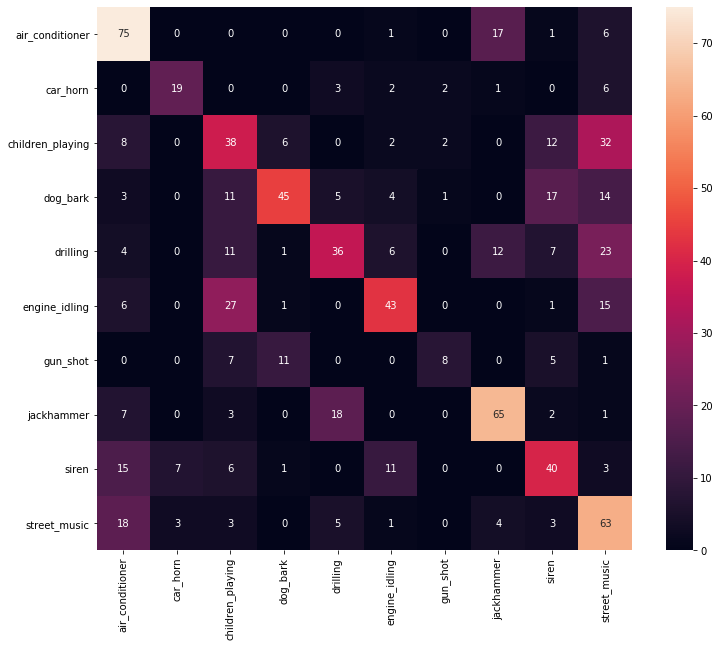

In [36]:
y_test_pred = model.predict_classes(x_test)

classes = pd.read_csv("classes.csv")
classes = classes['class'].tolist()

axis_labels = classes # labels for x-axis

# create seabvorn heatmap with required labels


import sklearn
array = sklearn.metrics.confusion_matrix(y_test_a, y_test_pred)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
sn.heatmap(array, annot=True, xticklabels=axis_labels, yticklabels=axis_labels)
# fixing axis that are cut otherwise
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

In [37]:
# Try with ReLU activation for hidden layers
model = Sequential()
model.add(Flatten(input_shape=[40, 5]))
model.add(Dense(300, activation="relu"))   
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_history = model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
model.evaluate(x_test, y_test)

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - 3s 357us/step - loss: 6.4380 - acc: 0.1636 - val_loss: 2.8710 - val_acc: 0.1243
Epoch 2/30
7895/7895 [==============================] - 1s 82us/step - loss: 1.9960 - acc: 0.3082 - val_loss: 2.0408 - val_acc: 0.3106
Epoch 3/30
7895/7895 [==============================] - 1s 80us/step - loss: 1.7268 - acc: 0.3944 - val_loss: 1.7822 - val_acc: 0.3608
Epoch 4/30
7895/7895 [==============================] - 1s 80us/step - loss: 1.4824 - acc: 0.4817 - val_loss: 1.6451 - val_acc: 0.4922
Epoch 5/30
7895/7895 [==============================] - 1s 80us/step - loss: 1.3079 - acc: 0.5446 - val_loss: 1.5594 - val_acc: 0.4755
Epoch 6/30
7895/7895 [==============================] - 1s 80us/step - loss: 1.2091 - acc: 0.5835 - val_loss: 1.6529 - val_acc: 0.5388
Epoch 7/30
7895/7895 [==============================] - 1s 80us/step - loss: 1.1251 - acc: 0.6139 - val_loss: 1.6990 - val_acc: 0.4588
Epoch 8

[1.789225997036076, 0.5209080047967756]

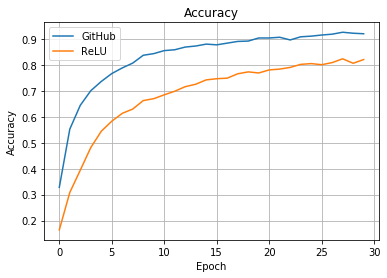

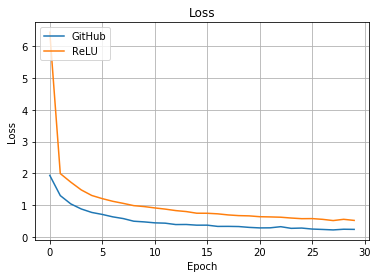

In [41]:
# Visualise loss/accuracy during training
import matplotlib.pyplot as plt

plt.plot(model_history.history['acc'])
plt.plot(ReLU_history.history['acc'])
# plt.plot(ReLU_Early_Stop_history.history['acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['GitHub', 'ReLU'], loc='upper left')
# plt.legend(['All features', 'ReLU', 'ReLU Early Stopping'], loc='upper left')
plt.grid()
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(ReLU_history.history['loss'])
# plt.plot(ReLU_Early_Stop_history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['GitHub', 'ReLU'], loc='upper left')
# plt.legend(['All features', 'ReLU', 'ReLU Early Stopping'], loc='upper left')
plt.grid()
plt.show()


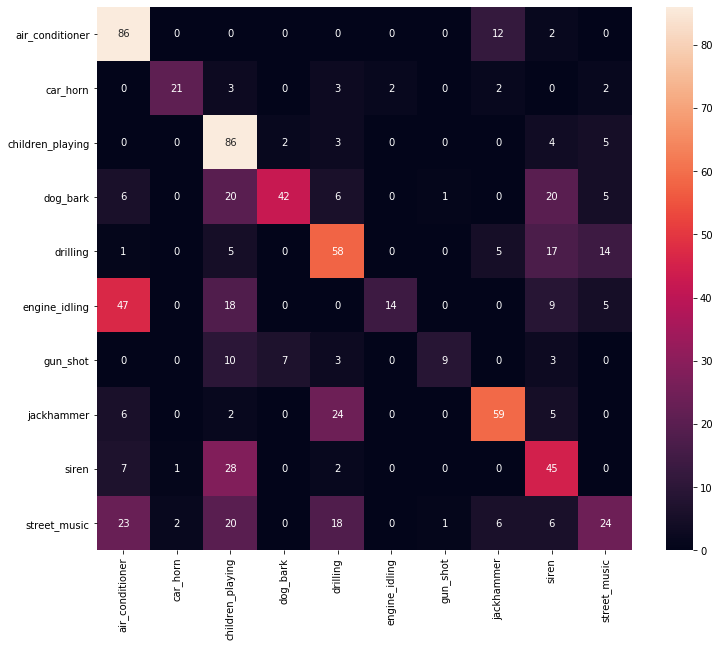

In [92]:
y_test_pred = model.predict_classes(x_test)

classes = pd.read_csv("classes.csv")
classes = classes['class'].tolist()

axis_labels = classes # labels for x-axis

# create seabvorn heatmap with required labels


import sklearn
array = sklearn.metrics.confusion_matrix(y_test_a, y_test_pred)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
sn.heatmap(array, annot=True, xticklabels=axis_labels, yticklabels=axis_labels)
# fixing axis that are cut otherwise
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

In [121]:
# 10 fold cross-validation
# Until we have the 10 folds with the features available, we will use random folds

import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold

# Cross-Validate
kf = KFold(10, shuffle=True, random_state=42) # Use for KFold classification
    
accuracy_scores = []

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# x_val = 1 of the folds
# x_test = next fold

fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Flatten(input_shape=[40, 5]))
    model.add(Dense(300, activation="relu"))   
    model.add(Dense(100, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
    model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test), verbose=0)
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}")    
    
# Write the cross-validated prediction
# oos_y = pd.DataFrame(oos_y)
# oos_pred = pd.DataFrame(oos_pred)
# oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)

Fold #1
874/874 [==============================] - 0s 54us/step
Fold score (Accuracy): 0.7734553778471609
Fold #2
874/874 [==============================] - 0s 57us/step
Fold score (Accuracy): 0.7105263160622638
Fold #3
873/873 [==============================] - 0s 57us/step
Fold score (Accuracy): 0.690721649689363
Fold #4
873/873 [==============================] - 0s 56us/step
Fold score (Accuracy): 0.6723940437328911
Fold #5
873/873 [==============================] - 0s 57us/step
Fold score (Accuracy): 0.558991981877221
Fold #6
873/873 [==============================] - 0s 58us/step
Fold score (Accuracy): 0.6712485684288872
Fold #7
873/873 [==============================] - 0s 64us/step
Fold score (Accuracy): 0.6781214205942886
Fold #8
873/873 [==============================] - 0s 59us/step
Fold score (Accuracy): 0.6403207333773409
Fold #9
873/873 [==============================] - 0s 59us/step
Fold score (Accuracy): 0.7445589921182237
Fold #10
873/873 [==============================

In [9]:
# 10 fold cross-validation
# Until we have the 10 folds with the features available, we will use random folds

import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold

# Cross-Validate
kf = KFold(10, shuffle=True, random_state=42) # Use for KFold classification
    
accuracy_scores = []

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# x_val = 1 of the folds
# x_test = next fold

fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,5,1)))
    model.add(MaxPooling2D(padding="same"))

    model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
    model.add(MaxPooling2D(padding="same"))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(10,activation="softmax"))

    #compiling
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    
    model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
    
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}")    
    
# Write the cross-validated prediction
# oos_y = pd.DataFrame(oos_y)
# oos_pred = pd.DataFrame(oos_pred)
# oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)

Fold #1





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7858 samples, validate on 874 samples
Epoch 1/30





7858/7858 [==============================] - 12s 2ms/step - loss: 1.9869 - acc: 0.3041 - val_loss: 1.5279 - val_acc: 0.4703
Epoch 2/30
7858/7858 [==============================] - 11s 1ms/step - loss: 1.3791 - acc: 0.5263 - val_loss: 1.1019 - val_acc: 0.6293
Epoch 3/30
7858/7858 [==============================] - 11s 1ms/step - loss: 1.0903 - acc: 0.6323 - val_loss: 0.9561 - val_acc: 0.6888
Epoch 4/30
7858/7858 [==============================] - 12s 1ms/step - loss: 0.9262 - acc: 0.6891 - val_loss: 0.7689 - val_acc: 0.7551
Epoch 5/30
7858/7858 [==============================] - 12s 2ms/step - loss: 0.8151 - acc: 0.7359 - val_loss: 0.6329 - val_acc: 0.7838
Epoch 6/30
7858/7858 [========================

7858/7858 [==============================] - 13s 2ms/step - loss: 0.2103 - acc: 0.9285 - val_loss: 0.2426 - val_acc: 0.9245
Fold score (Accuracy): 0.9244851258581236
Fold #2
Train on 7858 samples, validate on 874 samples
Epoch 1/30
7858/7858 [==============================] - 14s 2ms/step - loss: 2.0113 - acc: 0.2999 - val_loss: 1.6798 - val_acc: 0.4211
Epoch 2/30
7858/7858 [==============================] - 12s 2ms/step - loss: 1.4379 - acc: 0.5003 - val_loss: 1.0853 - val_acc: 0.6407
Epoch 3/30
7858/7858 [==============================] - 13s 2ms/step - loss: 1.1082 - acc: 0.6168 - val_loss: 0.9102 - val_acc: 0.6602
Epoch 4/30
7858/7858 [==============================] - 13s 2ms/step - loss: 0.9355 - acc: 0.6794 - val_loss: 0.8180 - val_acc: 0.7208
Epoch 5/30
7858/7858 [==============================] - 13s 2ms/step - loss: 0.8157 - acc: 0.7333 - val_loss: 0.6931 - val_acc: 0.7677
Epoch 6/30
7858/7858 [==============================] - 13s 2ms/step - loss: 0.7230 - acc: 0.7636 - val_

7859/7859 [==============================] - 13s 2ms/step - loss: 0.2660 - acc: 0.9147 - val_loss: 0.2567 - val_acc: 0.9210
Epoch 30/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2725 - acc: 0.9153 - val_loss: 0.2777 - val_acc: 0.9164
Fold score (Accuracy): 0.9163802978235968
Fold #4
Train on 7859 samples, validate on 873 samples
Epoch 1/30
7859/7859 [==============================] - 16s 2ms/step - loss: 2.0307 - acc: 0.2830 - val_loss: 1.5239 - val_acc: 0.4628
Epoch 2/30
7859/7859 [==============================] - 13s 2ms/step - loss: 1.4442 - acc: 0.5004 - val_loss: 1.0842 - val_acc: 0.6312
Epoch 3/30
7859/7859 [==============================] - 13s 2ms/step - loss: 1.1082 - acc: 0.6241 - val_loss: 0.8653 - val_acc: 0.7113
Epoch 4/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.9461 - acc: 0.6885 - val_loss: 0.7559 - val_acc: 0.7572
Epoch 5/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.8071 - acc: 0.7336 - val

7859/7859 [==============================] - 13s 2ms/step - loss: 0.2872 - acc: 0.9061 - val_loss: 0.2418 - val_acc: 0.9255
Epoch 29/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2737 - acc: 0.9146 - val_loss: 0.2774 - val_acc: 0.9084
Epoch 30/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2371 - acc: 0.9209 - val_loss: 0.2457 - val_acc: 0.9187
Fold score (Accuracy): 0.9186712486364315
Fold #6
Train on 7859 samples, validate on 873 samples
Epoch 1/30
7859/7859 [==============================] - 15s 2ms/step - loss: 1.9899 - acc: 0.3037 - val_loss: 1.4865 - val_acc: 0.5178
Epoch 2/30
7859/7859 [==============================] - 13s 2ms/step - loss: 1.3916 - acc: 0.5202 - val_loss: 1.0634 - val_acc: 0.6369
Epoch 3/30
7859/7859 [==============================] - 13s 2ms/step - loss: 1.0937 - acc: 0.6276 - val_loss: 0.8630 - val_acc: 0.7113
Epoch 4/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.9599 - acc: 0.6783 - va

7859/7859 [==============================] - 13s 2ms/step - loss: 0.2605 - acc: 0.9122 - val_loss: 0.3596 - val_acc: 0.8877
Epoch 28/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2949 - acc: 0.9056 - val_loss: 0.2957 - val_acc: 0.9129
Epoch 29/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2666 - acc: 0.9100 - val_loss: 0.3184 - val_acc: 0.9026
Epoch 30/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2420 - acc: 0.9220 - val_loss: 0.3123 - val_acc: 0.9175
Fold score (Accuracy): 0.9175257731958762
Fold #8
Train on 7859 samples, validate on 873 samples
Epoch 1/30
7859/7859 [==============================] - 16s 2ms/step - loss: 1.9603 - acc: 0.3079 - val_loss: 1.4770 - val_acc: 0.4754
Epoch 2/30
7859/7859 [==============================] - 13s 2ms/step - loss: 1.3947 - acc: 0.5214 - val_loss: 1.0567 - val_acc: 0.6415
Epoch 3/30
7859/7859 [==============================] - 13s 2ms/step - loss: 1.0704 - acc: 0.6366 - v

7859/7859 [==============================] - 13s 2ms/step - loss: 0.2895 - acc: 0.9057 - val_loss: 0.2951 - val_acc: 0.9107
Epoch 27/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2559 - acc: 0.9188 - val_loss: 0.2950 - val_acc: 0.9107
Epoch 28/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2410 - acc: 0.9212 - val_loss: 0.2669 - val_acc: 0.9198
Epoch 29/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.2969 - acc: 0.9083 - val_loss: 0.3559 - val_acc: 0.8981
Epoch 30/30
7859/7859 [==============================] - 13s 2ms/step - loss: 0.3197 - acc: 0.9071 - val_loss: 0.2642 - val_acc: 0.9278
Fold score (Accuracy): 0.9278350515463918
Fold #10
Train on 7859 samples, validate on 873 samples
Epoch 1/30
7859/7859 [==============================] - 16s 2ms/step - loss: 2.0426 - acc: 0.2794 - val_loss: 1.5578 - val_acc: 0.4582
Epoch 2/30
7859/7859 [==============================] - 13s 2ms/step - loss: 1.4536 - acc: 0.4937 -